In [1]:
from anharm.Hamiltonian import Hamil
import sympy as sp
import numpy as np
H = Hamil(4, 5, "line")

In [9]:
zzzz = H.split_deltas(H.zzexpr("1111"))
e = (H.zzexpr("1100")+H.zzexpr("0110")+H.zzexpr("0011")+H.zzexpr("1010")+H.zzexpr("0101")+H.zzexpr("1001"))
f_zzzz,vars_zzzz = H.lambdify_expr(zzzz)
# e = H.zzexpr("1111")-(H.zzexpr("1110")+H.zzexpr("1101")+H.zzexpr("1011")+H.zzexpr("0111"))
e = H.split_deltas(e) 
f,vars = H.lambdify_expr(e)
#\alpha_{0},\alpha_{1},\alpha_{2},g_{0,1},g_{1,2},g_{2,3},\Delta_{0,1},\Delta_{1,2},\Delta_{2,3}]
print(vars)
print(vars_zzzz)

[\alpha_{0}, \alpha_{1}, \alpha_{2}, \alpha_{3}, g_{0,1}, g_{1,2}, g_{2,3}, \Delta_{0,1}, \Delta_{1,2}, \Delta_{2,3}]
[\alpha_{0}, \alpha_{1}, \alpha_{2}, \alpha_{3}, g_{0,1}, g_{1,2}, g_{2,3}, \Delta_{0,1}, \Delta_{1,2}, \Delta_{2,3}]


C:\Users\oskar\AppData\Local\Temp\ipykernel_29264\73183734.py:20: RuntimeWarning: invalid value encountered in subtract
  Z = np.abs(ZZZZ-ZZ)/np.abs(ZZZZ)
C:\Users\oskar\AppData\Local\Temp\ipykernel_29264\73183734.py:20: RuntimeWarning: divide by zero encountered in divide
  Z = np.abs(ZZZZ-ZZ)/np.abs(ZZZZ)


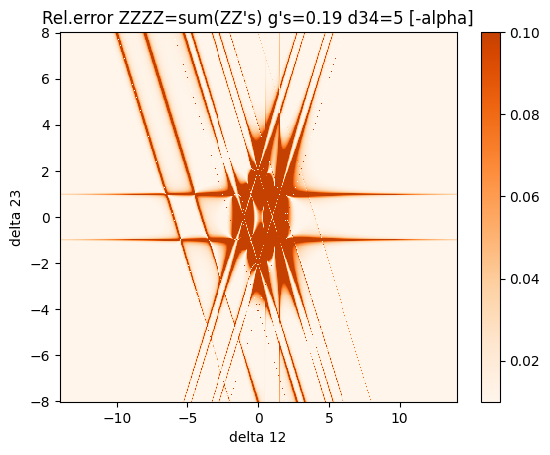

In [21]:
from matplotlib import pyplot as plt
from other.colormap import Norm, OrBu_colormap
from matplotlib import colors
g12 = 0.19
g23 = 0.19
g34 = 0.19
d34 = 5

dd13 = np.linspace(-8, 8, 400)
o2prims = np.linspace(-14, 14, 400)
d2prim_grid, dd13_grid = np.meshgrid(o2prims, dd13)
d23_grid = d2prim_grid + dd13_grid / 2
d12_grid = dd13_grid - d23_grid

colorss = plt.cm.Oranges(np.linspace(0, 0.8, 20))

cmap = colors.LinearSegmentedColormap.from_list("my_colormap", colorss)
ZZ = f(-1,-1,-1,-1, g12,g23,g34,d12_grid,d23_grid,d34)
ZZZZ = f_zzzz(-1,-1,-1,-1, g12,g23,g34,d12_grid,d23_grid,d34)
Z = np.abs(ZZZZ-ZZ)/np.abs(ZZZZ)

plt.pcolormesh(d2prim_grid,dd13_grid, Z, vmin=0.01, vmax=0.1, cmap=cmap)
plt.xlabel("delta 12")
plt.ylabel("delta 23")
plt.title(f"Rel.error ZZZZ=sum(ZZ's) g's=0.19 d34={d34} [-alpha]")
plt.colorbar()
plt.show()